In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# 한글 폰트를 사용할 때 마이너스 부호가 깨져 보이는 문제에 대처한다.
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [2]:
# pip install plotnine # 시각화 라이브러리 => R에서 시각화하는 방법과 유사하게 시각화한다.
from plotnine import *
import missingno as msno

In [3]:
# 현재 소스 프로그램의 위치(경로)를 보여준다.
%pwd

'C:\\k_digital\\python\\dataAnalysis\\workspace'

In [4]:
# 현재 소스 프로그램이 위치한 경로의 파일 목록을 보여준다.
%ls 
# %ls 폴더이름: 실행하면 현재 소스 프로그램이 위치한 경로 아래의 지정된 폴더의 파일 목록을 보여준다.

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BC02-8D30

 C:\k_digital\python\dataAnalysis\workspace 디렉터리

2023-09-04  오후 07:56    <DIR>          .
2023-09-04  오후 07:56    <DIR>          ..
2023-09-04  오후 05:51    <DIR>          .ipynb_checkpoints
2023-08-28  오후 07:42             7,538 00_numpy_0_axis.ipynb
2023-08-28  오후 07:08           130,771 01_numpy_1.ipynb
2023-09-01  오후 03:20            36,980 02_numpy_2.ipynb
2023-08-29  오후 08:39            61,291 03_numpy_3.ipynb
2023-08-30  오전 11:33            80,228 04_pandas_1.ipynb
2023-08-30  오후 07:05            79,724 05_pandas_2.ipynb
2023-08-31  오전 10:26           153,011 06_pandas_3.ipynb
2023-08-31  오후 02:24           114,639 07_pandas_4.ipynb
2023-09-01  오전 09:20           111,318 08_pandas_5.ipynb
2023-08-31  오후 08:10            38,619 09_pandas_6.ipynb
2023-09-01  오전 10:31            48,273 10_pandas_7.ipynb
2023-09-01  오후 02:02           136,448 11_matplotlib_hangle.ipynb
2023-09-01  오후 02:12            74,469 12_anscombe.ipynb
2023-09-01  

2015년 10월부터 2023년 6월까지 주택분양보증을 받아 분야한 전체 민간 신규 아파트 분양가격 동향  
공공데이터포털(https://www.data.go.kr/)에서 '민간 아파트' 검색  

<img src='./images/4.png' align='left' width='1200'/>
<img src='./images/44.png' align='left' width='1200'/>

In [5]:
# read_csv() 메소드로 csv 파일을 읽을 때 한글 인코딩 문제로 
# pd.read_csv('파일명')와 같이 읽을 때 아래와 같은 UnicodeDecodeError
# 에러가 발생할 수 있다.
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte
# UnicodeDecodeError가 발생하면 encoding='euc-kr' 옵션을 지정해야 
# csv 파일을 정상적으로 읽어 올 수 있다. (cp949, ms949)
# per_sale = pd.read_csv('./data/perSale_20230630.csv', encoding='euc-kr')
# per_sale = pd.read_csv('./data/perSale_20230630.csv', encoding='cp949')
# per_sale = pd.read_csv('./data/perSale_20230630.csv', encoding='ms949', engine='python') # 안될 경우 engine='python' 붙여준다.
per_sale = pd.read_csv('./data/perSale_20230630.csv')
per_sale.shape

(7905, 5)

In [6]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [7]:
per_sale.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
7900,제주,모든면적,2023,6,7326
7901,제주,전용면적 60제곱미터이하,2023,6,7381
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,7084
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639
7904,제주,전용면적 102제곱미터초과,2023,6,7506


engine 옵션을  지정하지 않고 사용하려면 csv 파일을 메모장으로 열고 파일 메뉴의 다른 이름으로 저장을 선택하고 인코딩 방식을 ANSI에서 UTF-8로 변경한 후 덮어쓰기로 저장하면 된다.  

<img src='./images/444.png' align='left' width='1200'/>

In [8]:
per_sale = pd.read_csv('./data/perSale_20230630.csv')
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


dtype 속성이나 info() 메소드를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 필요하다면 변경한다.  

In [9]:
per_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [10]:
per_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


In [11]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 
# 카테고리 형태의 데이터이므로 문자열로 변환한다.
# per_sale['연도'] = per_sale['연도'].astype(str)
# per_sale['연도'] = per_sale.get('연도').astype(str)
per_sale['연도'] = per_sale.연도.astype(str)
# 데이터프레임의 특정 열 1개를 얻어올 때 '데이터프레임[열]', 
# '데이터프레임.get(열)', '데이터프레임.열' 방식이 모두 사용 
# 가능하지만 데이터프레임의 특정 열에 데이터를 넣어줄때는 
# '데이터프레임.get(열)'을 사용하면 에러가 발생된다.
per_sale['월'] = per_sale['월'].astype(str)

In [12]:
per_sale.dtypes

지역명           object
규모구분          object
연도            object
월             object
분양가격(제곱미터)    object
dtype: object

In [13]:
# 분양가격(제곱미터)는 연산에 사용할 데이터이므로 숫자로 변경한다.
# per_sale['분양가격(제곱미터)'] = per_sale['분양가격(제곱미터)'].astype(float) # 에러
# astype() 메소드는 문자열을 숫자로 변경하려는 경우 숫자가 아닌 
# 문자열이 있으면 에러가 발생된다.
# 이때, to_numeric() 메소드를 사용하면 어느정도 오류를 제어할 수 있다.
# to_numeric() 메소드 errors 속성은 기본값이 raise로 숫자로 변경할 수
# 없는 값이 있으면 오류를 발생시킨다.
# errors 속성값을 ignore를 사용하면 숫자로 변경할 수 없는 값이 있으면
# 메소드를 무시한다.
# errors 속성값을 coerce를 사용하면 숫자로 변경할 수 없는 값이 있으면
# 데이터를 누락값으로 변경한다.
per_sale['분양가격(제곱미터)'] = pd.to_numeric(per_sale['분양가격(제곱미터)'], errors='coerce')
# 데이터의 '분양가격(제곱미터)'열에 '6,493' 형태로 입력되서 누락값으로
# 처리되는 문제가 발생될 수 있다. 
# csv 파일을 엑셀로 열어서 데이터 서식을 일반으로 변경한 후 다시 
# 저장해서 사용한다. => 엑셀 작업은 영상을 참조한다.

In [14]:
per_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
dtype: object

In [15]:
# 숫자로 변경된 '분양가격(제곱미터)'열을 이용해서 평당 분양 가격을 
# 계산한 열을 추가한다.
per_sale['평당분양가격'] = per_sale['분양가격(제곱미터)'] * 3.3
per_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object

In [16]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [17]:
# isnull() 메소드와 sum() 메소드를 사용해서 누락값이 존재하는가 
# 확인하기
print(per_sale.isnull().sum())

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    583
평당분양가격        583
dtype: int64


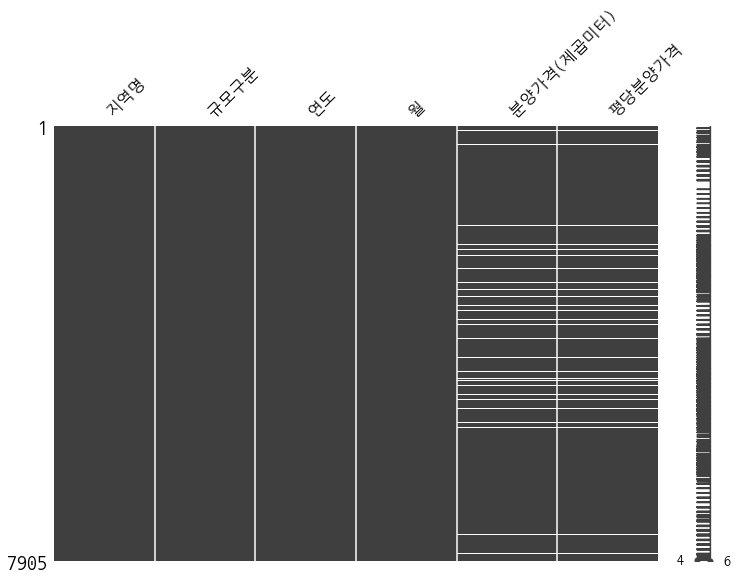

In [18]:
# missing 라이브러리로 그래프를 그려서 누락값의 위치 확인하기 
# => 중간 중간 흰색으로 보이는 부분이 누락값이다.
# missing 라이브러리 그래프 크기는 아래와 같이 figsize 옵션에 지정하면 된다.
msno.matrix(per_sale, figsize=(12,8))
plt.show()

In [19]:
# 2017년 데이터만 추출한다.
per_sale_2017 = per_sale[per_sale['연도'] == '2017']
# per_sale_2017 = per_sale.loc[per_sale['연도'] == '2017']
per_sale_2017

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
1275,서울,모든면적,2017,1,6450.0,21285.0
1276,서울,전용면적 60제곱미터이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60제곱미터초과 85제곱미터이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85제곱미터초과 102제곱미터이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102제곱미터초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,모든면적,2017,12,3578.0,11807.4
2291,제주,전용면적 60제곱미터이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60제곱미터초과 85제곱미터이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85제곱미터초과 102제곱미터이하,2017,12,NaN,NaN


In [20]:
# 지역별 데이터가 동일하게 저장되어 있다.
per_sale['지역명'].value_counts()

부산    465
울산    465
충남    465
경북    465
강원    465
서울    465
인천    465
대전    465
전북    465
광주    465
전남    465
제주    465
대구    465
경기    465
충북    465
경남    465
세종    465
Name: 지역명, dtype: int64

In [21]:
# 규모구분별 데이터가 동일하게 저장되어 있다.
per_sale['규모구분'].value_counts()

전용면적 85제곱미터초과 102제곱미터이하    1581
전용면적 60제곱미터이하              1581
전용면적 60제곱미터초과 85제곱미터이하     1581
모든면적                       1581
전용면적 102제곱미터초과             1581
Name: 규모구분, dtype: int64

전국 연도별 평균 평당 분양 가격

In [22]:
# per_sale.groupby(per_sale['연도'])['평당분양가격'].mean()
per_sale.groupby(per_sale.연도).평당분양가격.mean()

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16277.103106
Name: 평당분양가격, dtype: float64

In [23]:
# pd.options.display.float_format 속성을 사용해서 데이터프레임에 
# 저장된 실수 데이터의 출력 서식을 지정할 수 있다.
# 출력 서식 '{:,.1f}'는 천 단위마다 ','를 출력하고, '.'뒤의 숫자만큼 
# 소수점 아래 자리를 표시한다.
# 'f'를 붙이지 않으면 숫자가 지수기호 'e'를 사용하는 지수 형태로 표시된다.
pd.options.display.float_format = '{:,.1f}'.format

In [24]:
# describe() 메소드로 데이터프레임 숫자 데이터가 저장된 열의 요약 
# 통계량을 확인 할 수 있다.
per_sale.groupby(per_sale['연도']).describe()

분양가격(제곱미터)                                                           \
          count    mean     std     min     25%     50%     75%      max   
연도                                                                         
2015      243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5  7,092.0   
2016      984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5  8,096.0   
2017      975.0 3,143.3 1,110.5 1,976.0 2,373.0 2,838.0 3,466.0  7,887.0   
2018      919.0 3,327.0 1,186.1 2,076.0 2,525.0 2,952.0 3,698.0  8,098.0   
2019      912.0 3,693.4 1,563.2 2,124.0 2,635.5 3,395.0 4,066.2 12,728.0   
2020      882.0 3,951.3 1,632.7 2,297.0 2,780.5 3,734.5 4,441.0 13,835.0   
2021      945.0 4,132.1 1,567.7 2,409.0 3,057.0 3,858.0 4,539.0 10,746.0   
2022      979.0 4,528.0 1,521.7 2,657.0 3,284.5 4,189.0 5,231.5 10,322.0   
2023      483.0 4,932.5 1,681.5 2,785.0 3,625.0 4,659.0 5,756.0 11,911.0   

     평당분양가격                                                               
      count     mean     std     min      25%      50%      75%      max  
연도                                                                        
2015  243.0  9,202.7 3,223.6 6,164.4  7,342.5  8,302.8  9,984.1 23,403.6  
2016  984.0  9,683.0 3,535.8 6,270.0  7,530.6  8,817.6 10,390.0 26,716.8  
2017  975.0 10,372.9 3,664.7 6,520.8  7,830.9  9,365.4 11,437.8 26,027.1  
2018  919.0 10,978.9 3,914.1 6,850.8  8,332.5  9,741.6 12,203.4 26,723.4  
2019  912.0 12,188.3 5,158.6 7,009.2  8,697.1 11,203.5 13,418.6 42,002.4  
2020  882.0 13,039.4 5,388.1 7,580.1  9,175.6 12,323.8 14,655.3 45,655.5  
2021  945.0 13,636.0 5,173.4 7,949.7 10,088.1 12,731.4 14,978.7 35,461.8  
2022  979.0 14,942.5 5,021.7 8,768.1 10,838.8 13,823.7 17,263.9 34,062.6  
2023  483.0 16,277.1 5,549.1 9,190.5 11,962.5 15,374.7 18,994.8 39,306.3

In [25]:
# describe() 메소드 실행 결과를 'T' 속성을 지정해서 전치시켜서 요약 통계량을 수직 방향으로 출력할 수 있다.
per_sale.groupby(per_sale['연도']).describe().T

연도                   2015     2016     2017     2018     2019     2020  \
분양가격(제곱미터) count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   2,788.7  2,934.2  3,143.3  3,327.0  3,693.4  3,951.3   
           std      976.9  1,071.4  1,110.5  1,186.1  1,563.2  1,632.7   
           min    1,868.0  1,900.0  1,976.0  2,076.0  2,124.0  2,297.0   
           25%    2,225.0  2,282.0  2,373.0  2,525.0  2,635.5  2,780.5   
           50%    2,516.0  2,672.0  2,838.0  2,952.0  3,395.0  3,734.5   
           75%    3,025.5  3,148.5  3,466.0  3,698.0  4,066.2  4,441.0   
           max    7,092.0  8,096.0  7,887.0  8,098.0 12,728.0 13,835.0   
평당분양가격     count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   9,202.7  9,683.0 10,372.9 10,978.9 12,188.3 13,039.4   
           std    3,223.6  3,535.8  3,664.7  3,914.1  5,158.6  5,388.1   
           min    6,164.4  6,270.0  6,520.8  6,850.8  7,009.2  7,580.1   
           25%    7,342.5  7,530.6  7,830.9  8,332.5  8,697.1  9,175.6   
           50%    8,302.8  8,817.6  9,365.4  9,741.6 11,203.5 12,323.8   
           75%    9,984.1 10,390.0 11,437.8 12,203.4 13,418.6 14,655.3   
           max   23,403.6 26,716.8 26,027.1 26,723.4 42,002.4 45,655.5   

연도                   2021     2022     2023  
분양가격(제곱미터) count    945.0    979.0    483.0  
           mean   4,132.1  4,528.0  4,932.5  
           std    1,567.7  1,521.7  1,681.5  
           min    2,409.0  2,657.0  2,785.0  
           25%    3,057.0  3,284.5  3,625.0  
           50%    3,858.0  4,189.0  4,659.0  
           75%    4,539.0  5,231.5  5,756.0  
           max   10,746.0 10,322.0 11,911.0  
평당분양가격     count    945.0    979.0    483.0  
           mean  13,636.0 14,942.5 16,277.1  
           std    5,173.4  5,021.7  5,549.1  
           min    7,949.7  8,768.1  9,190.5  
           25%   10,088.1 10,838.8 11,962.5  
           50%   12,731.4 13,823.7 15,374.7  
           75%   14,978.7 17,263.9 18,994.8  
           max   35,461.8 34,062.6 39,306.3

전국 규모별 연도별 평균 평당 분양 가격

In [26]:
# pivot_table() 메소드는 엑셀의 피벗 테이블과 유사한 형태로 데이터를 
# 리턴한다.
# pivot_table(value, index[, columns, aggfunc, fill_value])
# value: 피벗 테이블을 작성할 데이터프레임의 열을 지정한다.
# index: 그룹화의 첫 번째 기준으로 사용할 데이터프레임의 열을 지정한다.
# => 행 단위 그룹화
# columns: 그룹화의 두 번째 기준으로 사용할 데이터프레임의 열을 지정한다.
# => 열 단위 그룹화
# aggfunc: 그룹화된 결과에 적용할 함수를 지정한다. 
# mean이 기본값, count, sum, mean, max, min, std, median 등 사용가능
# fill_value: 피벗 테이블에 표시되는 NaN을 대체할 데이터를 지정한다.
# 주로 0을 사용한다.
per_sale_pivot = per_sale.pivot_table('평당분양가격', '규모구분', '연도', aggfunc='mean')
per_sale_pivot

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
규모구분,,,,,,,,,
모든면적,"8,893.0","9,293.0","9,927.3","10,675.8","11,602.7","12,317.7","13,706.9","14,690.3","15,918.6"
전용면적 102제곱미터초과,"9,837.2","10,388.7","11,311.2","11,445.6","13,331.5","14,068.4","14,380.8","15,990.6","17,272.7"
전용면적 60제곱미터이하,"8,951.5","9,398.9","10,271.4","10,844.4","11,506.8","12,400.8","12,983.8","13,948.0","16,230.7"
전용면적 60제곱미터초과 85제곱미터이하,"8,891.8","9,296.0","9,840.4","10,650.6","11,677.2","12,327.5","13,644.4","14,695.2","15,673.3"
전용면적 85제곱미터초과 102제곱미터이하,"9,518.5","10,122.4","10,573.4","11,441.7","12,980.7","14,759.6","13,532.1","15,523.5","16,378.5"


전국 지역별 평균 평당 분양 가격

In [27]:
# 규모 구분이 모든 면적으로 되어있는 평균 평당 분양 가격으로 연도별 
# 변동 급액을 살펴보자.
region_year_all = per_sale[per_sale['규모구분'] == '모든면적']
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
7880,전북,모든면적,2023,6,"3,371.0","11,124.3"
7885,전남,모든면적,2023,6,"3,402.0","11,226.6"
7890,경북,모든면적,2023,6,"3,830.0","12,639.0"
7895,경남,모든면적,2023,6,"3,532.0","11,655.6"


In [28]:
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도')
region_year

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"


In [29]:
# pivot_table() 메소드의 실행 결과는 2번째 인수(index)가 피벗 
# 테이블의 index로 사용되므로 기존 index를 데이터로 사용하고 index를 
# 다시 지정하려면 pivot_table() 메소드의 실행 결과에 reset_index() 
# 메소드를 실행한다.
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year.head()

연도,지역명,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [30]:
print(region_year.columns) # 열 인덱스를 얻어온다.
print(region_year.columns.name) # 열 인덱스의 이름을 얻어온다.
# 데이터프레임의 columns 속성에 리스트 형태로 컬럼 이름을 넘겨서 전체 
# 컬럼 이름을 일괄적으로 변경할 수 있다.
region_year.columns = ['지역', '2015년', '2016년', '2017년', '2018년',
                    '2019년', '2020년', '2021년', '2022년', '2023년']

Index(['지역명', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object', name='연도')
연도


In [31]:
print(region_year.columns)
region_year.columns.name = '일련번호' # 열 인덱스의 이름을 변경한다.
region_year.head()

Index(['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년',
       '2022년', '2023년'],
      dtype='object')


일련번호,지역,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [32]:
# rename() 메소드로 특정 컬럼 이름을 선택해서 변경할 수 있다. 
# 다시 저장해야 데이터프레임에 반영된다.
region_year = region_year.rename(columns={'지역':'지역이름'})
region_year.head()

일련번호,지역이름,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [33]:
# inplace=True 옵션을 지정하면 함수가 실행된 결과를 다시 저장하지 
# 않아도 데이터프레임에 반영된다.
region_year.rename(columns={'지역이름':'시도'}, inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [58]:
print(list(region_year.index))
# 데이터프레임의 index 속성에 리스트 형태로 인덱스 이름을 넘겨서 전체 인덱스를 일괄적으로 변경할 수 있다.
region_year.index = ['00', '01', '02', '03', '04', '05', '06', '07',
                     '08', '09', '10', '11', '12', '13', '14', '15',
                     '16']
print(region_year.index)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16'],
      dtype='object')


In [35]:
# rename() 함수로 특정 인덱스 이름을 선택해서 변경할 수 있다.
region_year.rename(index={'00': '0번째', '01':'1번째'}, inplace=True)
region_year

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
03,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
05,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
06,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
07,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
08,서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"
09,세종,"8,750.5","8,860.5","9,133.0","10,354.8","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3"


In [36]:
# 특정 인덱스에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.columns[0])
print(region_year.index[0])

시도
0번째


In [37]:
for i in range(17):
    region_year.rename(index={region_year.index[i]:i}, inplace=True)
region_year

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.8","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3"


전국 지역별 평균 분양 가격 변동 금액

In [38]:
region_year['변동액'] = region_year['2023년'] - region_year['2015년'] 
region_year

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,변동액
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9","5,616.1"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5","8,015.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4","4,221.8"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4","5,329.5"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5","8,981.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2","7,973.9"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5","7,758.3"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2","9,336.2"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6","11,164.4"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.8","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3","3,528.8"


In [62]:
max_delta_price = np.max(region_year['변동액'])
print(max_delta_price)
sido = region_year[region_year['변동액'] == max_delta_price]['시도'].values[0]
# sido = region_year[region_year['변동액'] == max_delta_price].values[0][0]
print('2015년 부터 2023년 까지 분양가는 계속 상승했으며, '
      '상승액이 가장 큰 지역은 {}로 상승액은 평당 {:,.0f}원이다.'.
      format(sido, max_delta_price * 1000))

16144.149999999994
2015년 부터 2023년 까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주로 상승액은 평당 16,144,150원이다.


In [63]:
min_delta_price = np.min(region_year['변동액'])
print(min_delta_price)
sido = region_year[region_year['변동액']== min_delta_price]['시도'].values[0]
# sido = region_year[region_year['변동액']== min_delta_price].values[0][0]
print('2015년 부터 2023년 까지 분양가는 대부분 상승했으며, 상승액이 '
      '가장 작은 지역은 {}으로 상승액은 평당 {:,.0f}원이다.'.
      format(sido, min_delta_price * 1000))

3528.800000000001
2015년 부터 2023년 까지 분양가는 대부분 상승했으며, 상승액이 가장 작은 지역은 세종으로 상승액은 평당 3,528,800원이다.


plotnine 라이브러리를 이용한 시각화

In [41]:
region_year_all.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"


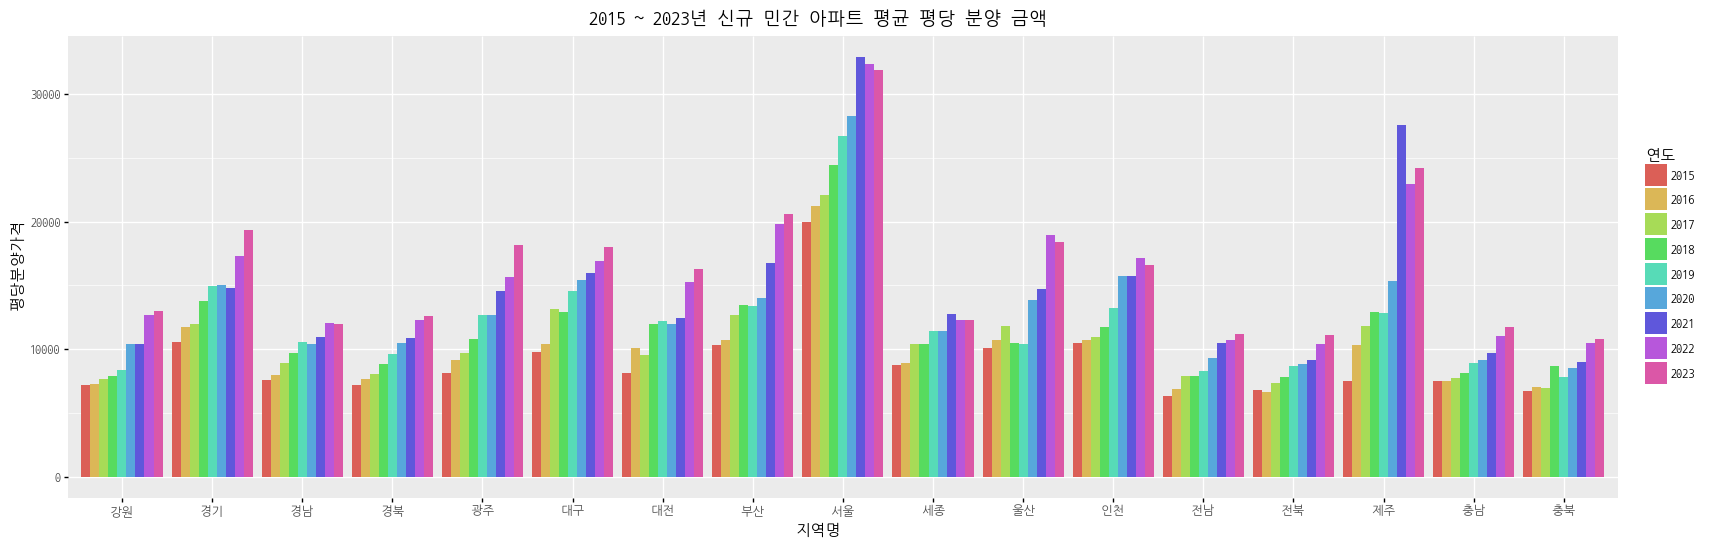

<ggplot: (145761406198)>

In [67]:
# 연도별 평균 평당 분양 금액 시각화
# ggplot(데이터프레임, aes(x=x축, y=y축, fill='범례')) # 차트 배경 생성
#     + 차트함수() # 차트 배경 위에 차트를 만든다.
# stat='identity'누적 막대 그래프, position='dodge' 개별 막대 그래프
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))\
    + geom_bar(stat='identity', position='dodge')\
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,6))\
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 금액')

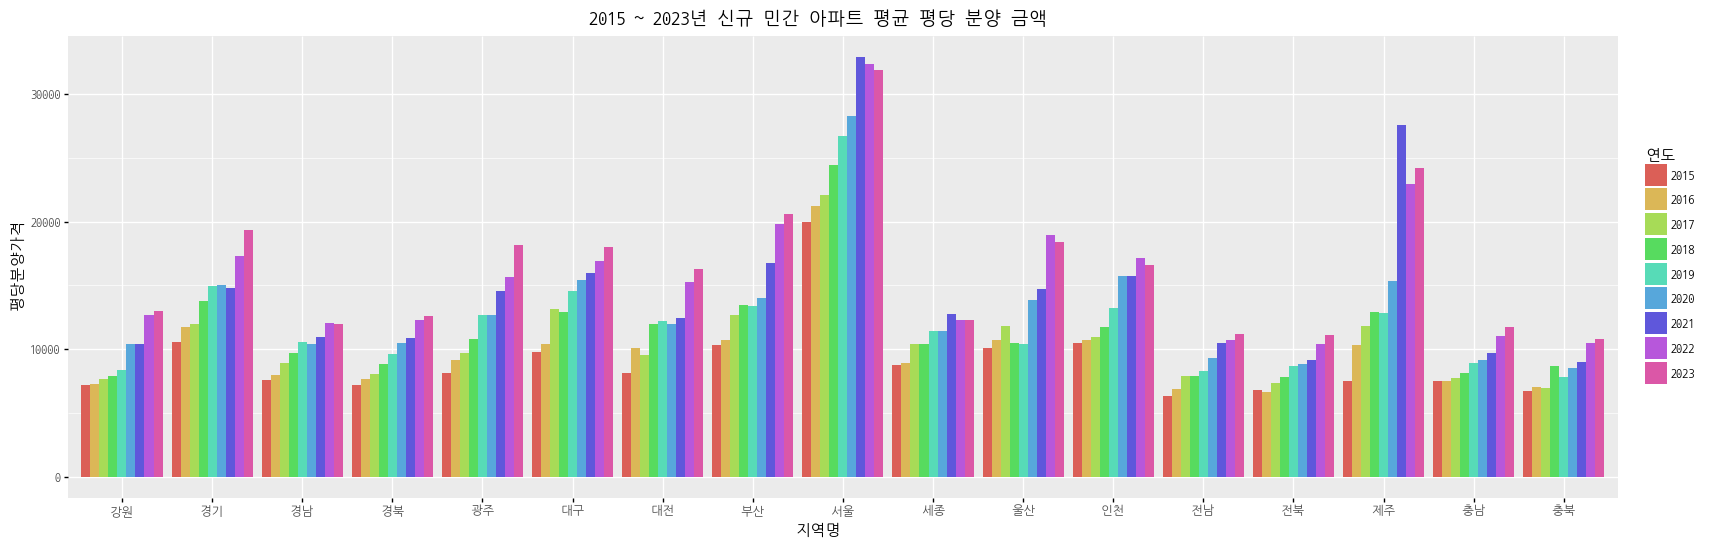

<ggplot: (145761419503)>

In [43]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
    + geom_bar(stat='identity', position='dodge')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,6))
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 금액'))

In [44]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"


In [45]:
# 규모별 지역별 평당 분양 금액 합계 피벗 테이블
per_sale_sum = per_sale.pivot_table('평당분양가격', '규모구분', '지역명', aggfunc='sum').reset_index()
per_sale_sum.columns.name = 'No'
per_sale_sum

No,규모구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,모든면적,"817,911.6","1,288,613.7","901,098.0","864,623.1","1,106,968.5","1,270,407.6","1,037,840.1","1,277,014.2","2,377,904.1","928,689.3","1,077,103.5","1,221,887.7","785,182.2","760,808.4","1,397,210.1","810,678.0","747,522.6"
1,전용면적 102제곱미터초과,"976,743.9","1,467,358.2","943,222.5","947,136.3","1,096,537.2","1,400,444.1","681,209.1","1,306,057.5","2,315,154.6","854,762.7","758,128.8","1,397,041.8","890,650.2","835,906.5","1,171,014.9","835,144.2","826,593.9"
2,전용면적 60제곱미터이하,"819,898.2","1,337,410.8","887,267.7","846,664.5","978,888.9","1,265,371.8","960,029.4","1,242,057.3","2,444,095.5","714,925.2","925,112.1","1,215,492.3","764,636.4","758,171.7","1,079,697.3","813,516.0","747,535.8"
3,전용면적 60제곱미터초과 85제곱미터이하,"803,203.5","1,285,155.3","896,685.9","862,082.1","1,095,431.7","1,271,222.7","1,033,431.3","1,274,582.1","2,373,538.2","890,310.3","1,081,888.5","1,220,914.2","782,793.0","757,610.7","1,374,390.6","837,421.2","751,271.4"
4,전용면적 85제곱미터초과 102제곱미터이하,"793,976.7","1,392,758.4","1,116,838.8","779,902.2","359,181.9","1,132,639.2","245,094.3","1,251,680.1","2,510,742.3","763,200.9","565,290.0","1,303,991.7","713,433.6","799,751.7","800,141.1","852,396.6","812,407.2"


In [69]:
per_sale_melt = pd.melt(per_sale_sum, '규모구분')
# per_sale_melt.columns = ['규모구분', '지역명', '평당분양가격']
per_sale_melt.rename(columns={'No':'지역명', 'value':'평당분양가격'}, inplace=True)
per_sale_melt

,규모구분,지역명,평당분양가격
0,모든면적,강원,"817,911.6"
1,전용면적 102제곱미터초과,강원,"976,743.9"
2,전용면적 60제곱미터이하,강원,"819,898.2"
3,전용면적 60제곱미터초과 85제곱미터이하,강원,"803,203.5"
4,전용면적 85제곱미터초과 102제곱미터이하,강원,"793,976.7"
...,...,...,...
80,모든면적,충북,"747,522.6"
81,전용면적 102제곱미터초과,충북,"826,593.9"
82,전용면적 60제곱미터이하,충북,"747,535.8"
83,전용면적 60제곱미터초과 85제곱미터이하,충북,"751,271.4"


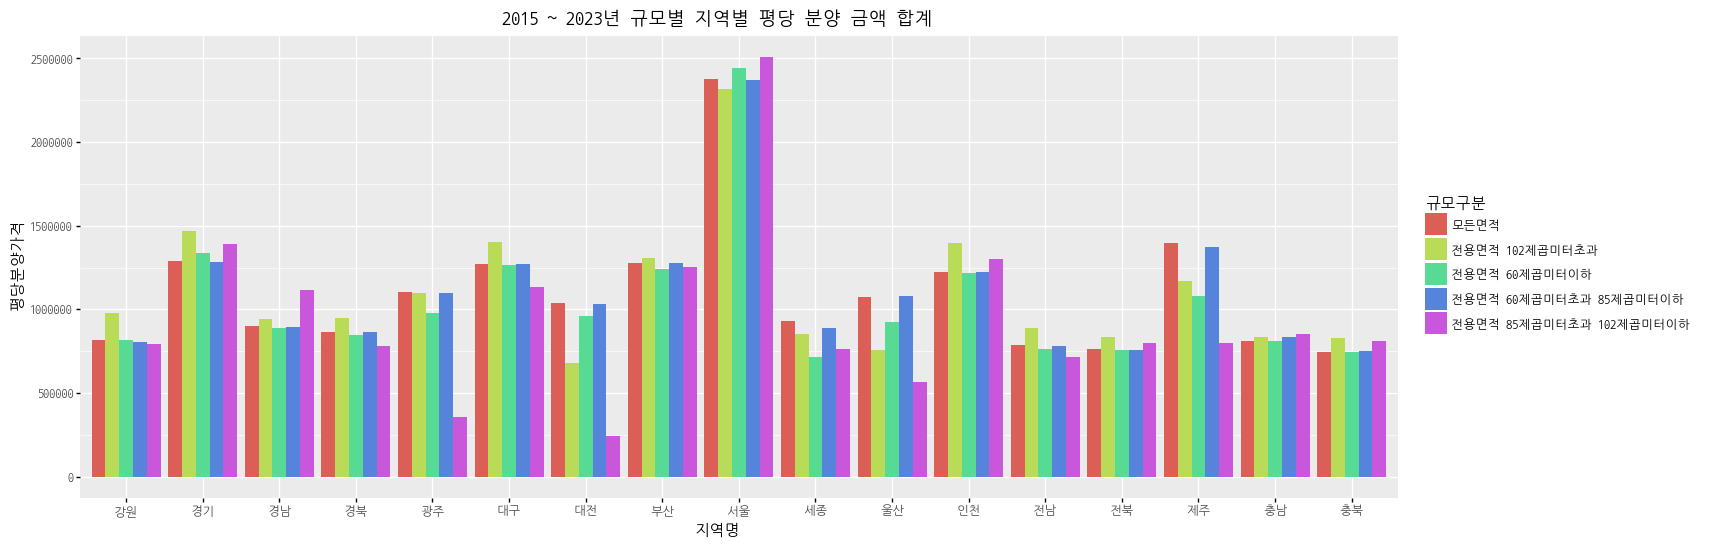

<ggplot: (145761532925)>

In [47]:
# 규모별 지역별 평당 분양 금액 합계 시각화
(
    ggplot(per_sale_melt, aes(x='지역명', y='평당분양가격', fill='규모구분'))
    + geom_bar(stat='identity', position='dodge') # stat='identity'누적 막대 그래프, position='dodge' 개별 막대 그래프
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(17,6))
    + ggtitle('2015 ~ 2023년 규모별 지역별 평당 분양 금액 합계')
)

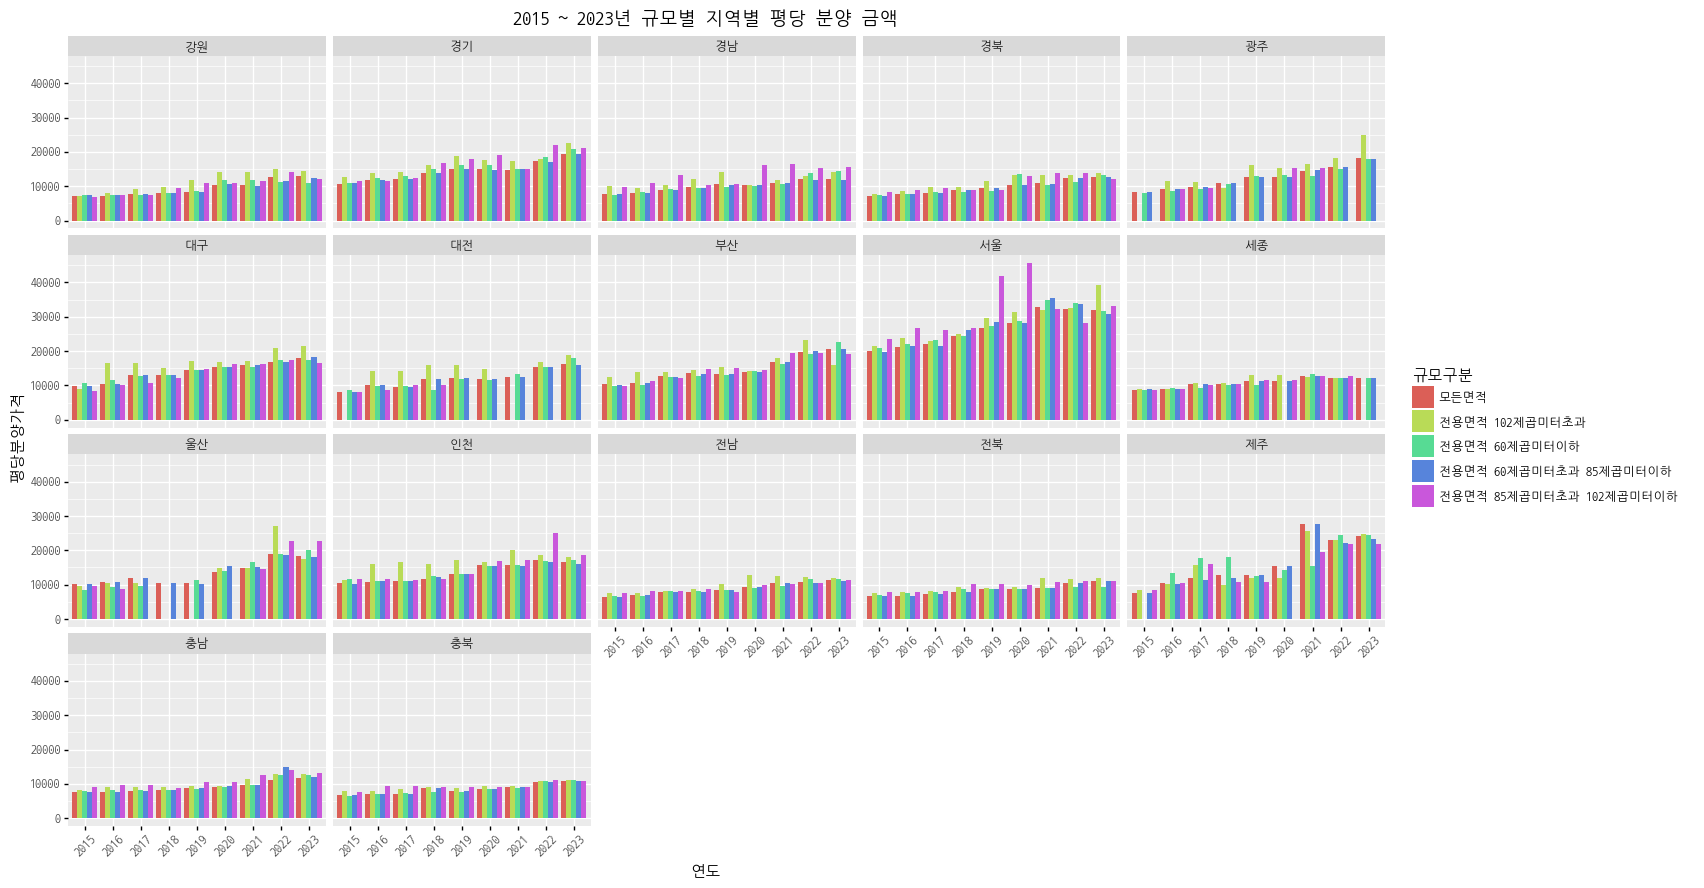

<ggplot: (145764656932)>

In [74]:
# 규모별 지역별 평당 분양 금액 합계 시각화
(
    ggplot(per_sale, aes(x='연도', y='평당분양가격', fill='규모구분'))
    + geom_bar(stat='identity', position='dodge') 
    + facet_wrap('지역명')
    + theme(text=element_text(family='NanumGothicCoding'), 
    figure_size=(17,10), axis_text_x=element_text(rotation=45))
    + ggtitle('2015 ~ 2023년 규모별 지역별 평당 분양 금액')
)

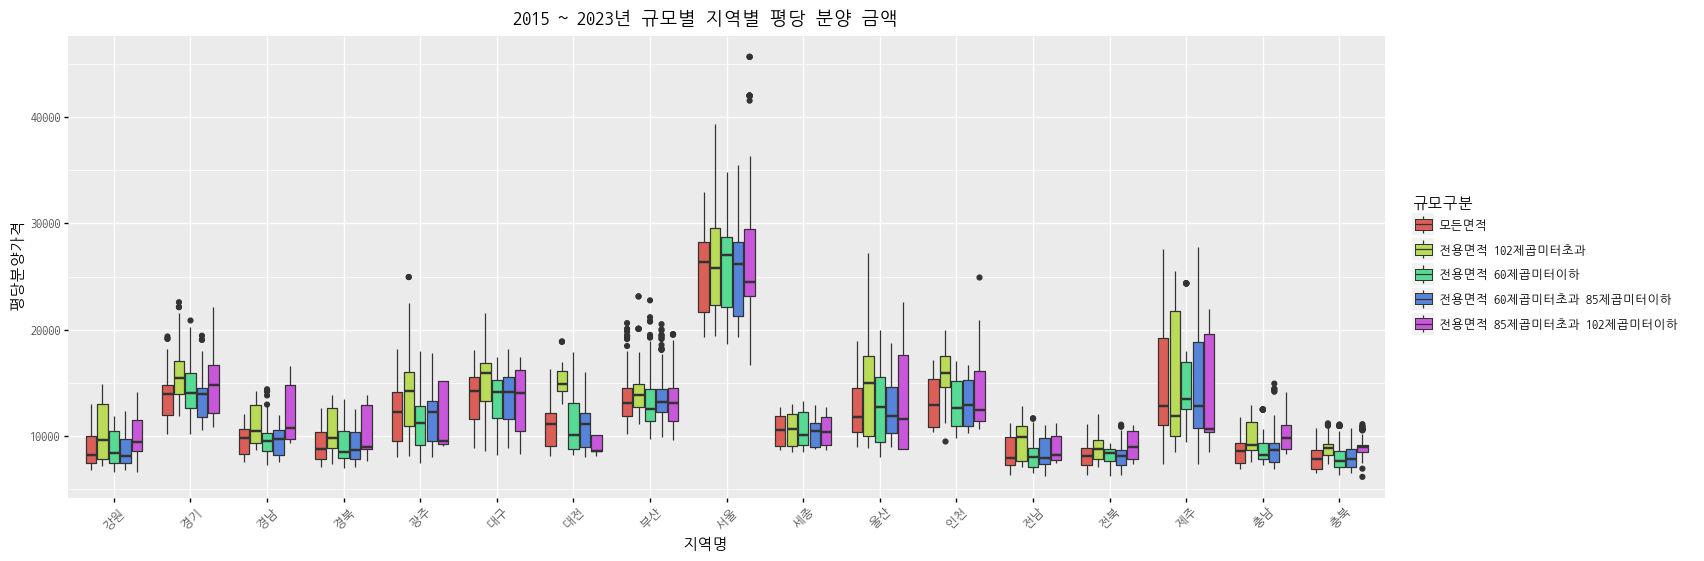

<ggplot: (145763713000)>

In [71]:
# boxplot을 그려보자.
(
    ggplot(per_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
    + geom_boxplot()
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(17,6), axis_text_x=element_text(rotation=45))
    + ggtitle('2015 ~ 2023년 규모별 지역별 평당 분양 금액')
)

In [50]:
# 사업 규모가 가장 컸던 서울
per_sale_seoul = per_sale[per_sale['지역명']=='서울']
per_sale_seoul

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
7820,서울,모든면적,2023,6,"9,675.0","31,927.5"
7821,서울,전용면적 60제곱미터이하,2023,6,"9,555.0","31,531.5"
7822,서울,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"9,325.0","30,772.5"
7823,서울,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"10,057.0","33,188.1"


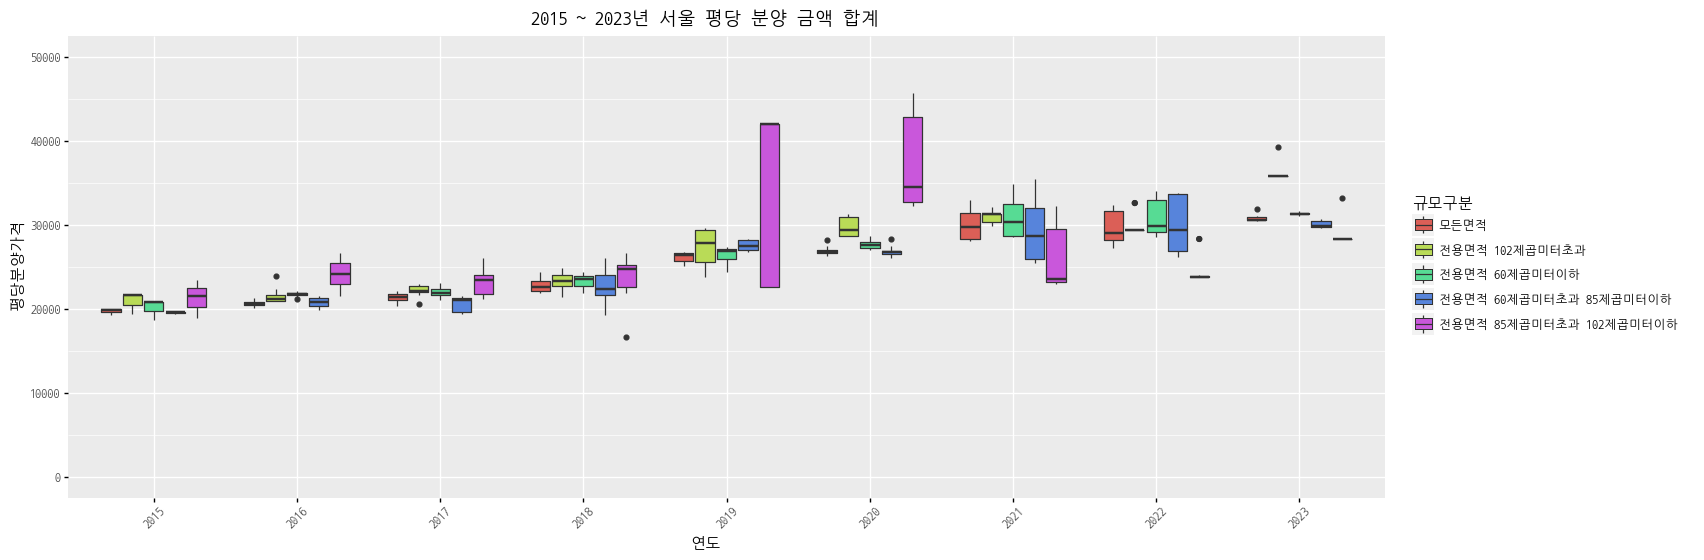

<ggplot: (145762180507)>

In [51]:
(
    ggplot(per_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분'))
    + geom_boxplot()
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(17,6), axis_text_x=element_text(rotation=45))
    + ggtitle('2015 ~ 2023년 서울 평당 분양 금액')
    + scale_y_continuous(limits=(0,50000))
)

In [52]:
# 상승액이 가장 큰 지역 제주
per_sale_jeju = per_sale[per_sale['지역명']=='제주']
per_sale_jeju

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
80,제주,모든면적,2015,10,"2,232.0","7,365.6"
81,제주,전용면적 60제곱미터이하,2015,10,nan,nan
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225.0","7,342.5"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583.0","8,523.9"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574.0","8,494.2"
...,...,...,...,...,...,...
7900,제주,모든면적,2023,6,"7,326.0","24,175.8"
7901,제주,전용면적 60제곱미터이하,2023,6,"7,381.0","24,357.3"
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"7,084.0","23,377.2"
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"6,639.0","21,908.7"


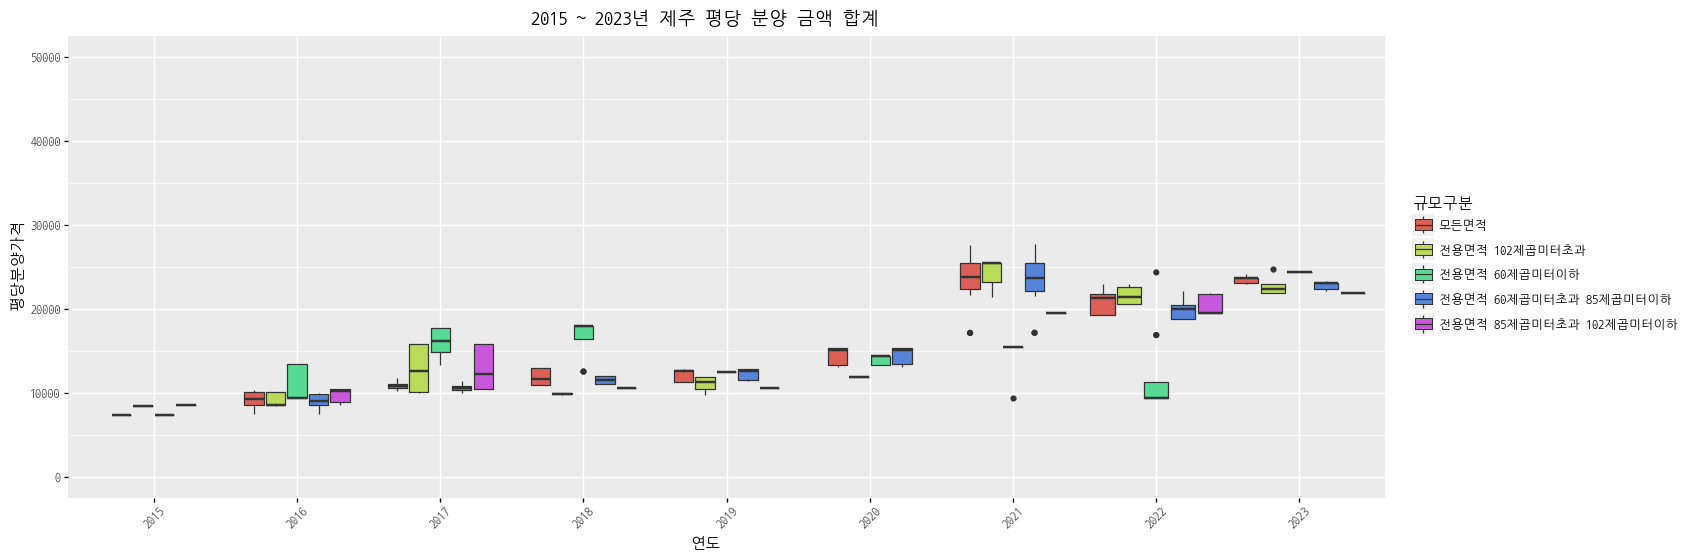

<ggplot: (-9223371891093365630)>

In [53]:
(
    ggplot(per_sale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분'))
    + geom_boxplot()
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(17,6), axis_text_x=element_text(rotation=45))
    + ggtitle('2015 ~ 2023년 제주 평당 분양 금액')
    + scale_y_continuous(limits=(0,50000))
)

In [54]:
# 상승액이 가장 작은 지역 세종
per_sale_sejong = per_sale[per_sale['지역명']=='세종']
per_sale_sejong

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
40,세종,모든면적,2015,10,"2,642.0","8,718.6"
41,세종,전용면적 60제곱미터이하,2015,10,"2,572.0","8,487.6"
42,세종,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,657.0","8,768.1"
43,세종,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,644.0","8,725.2"
44,세종,전용면적 102제곱미터초과,2015,10,"2,692.0","8,883.6"
...,...,...,...,...,...,...
7860,세종,모든면적,2023,6,"3,721.0","12,279.3"
7861,세종,전용면적 60제곱미터이하,2023,6,"3,724.0","12,289.2"
7862,세종,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"3,717.0","12,266.1"
7863,세종,전용면적 85제곱미터초과 102제곱미터이하,2023,6,nan,nan


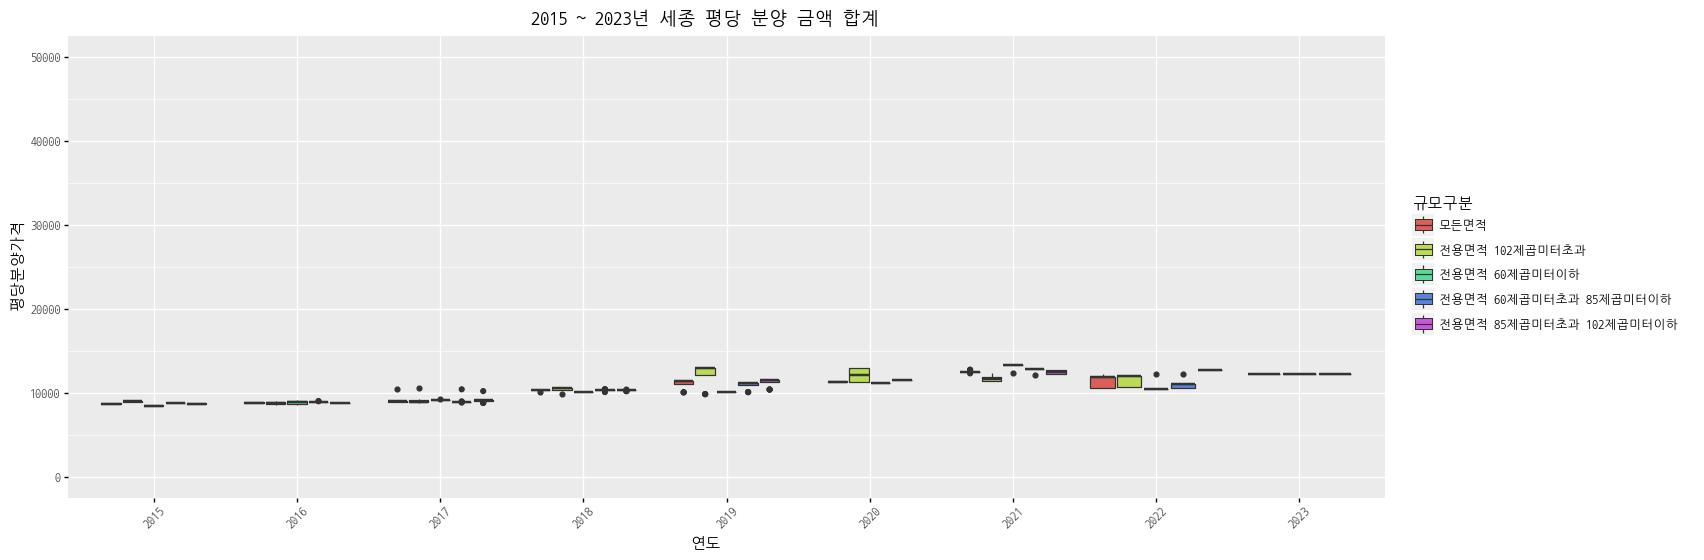

<ggplot: (-9223371891091080402)>

In [55]:
(
    ggplot(per_sale_sejong, aes(x='연도', y='평당분양가격', fill='규모구분'))
    + geom_boxplot()
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(17,6), axis_text_x=element_text(rotation=45))
    + ggtitle('2015 ~ 2023년 세종 평당 분양 금액 합계')
    + scale_y_continuous(limits=(0,50000))
)